Creating dataset in csv format.
y = mx+c which represents a straight line in the graph.
m = 2
c = 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_value = np.linspace(-10, 10, 100)
m = 2
c = 4
y_value = m * x_value + c
clean_dataset = pd.DataFrame({"x": x_value, "y": y_value})
clean_dataset.head()
clean_dataset.to_csv("clean_data.csv", index=False)


Plot clean dataset

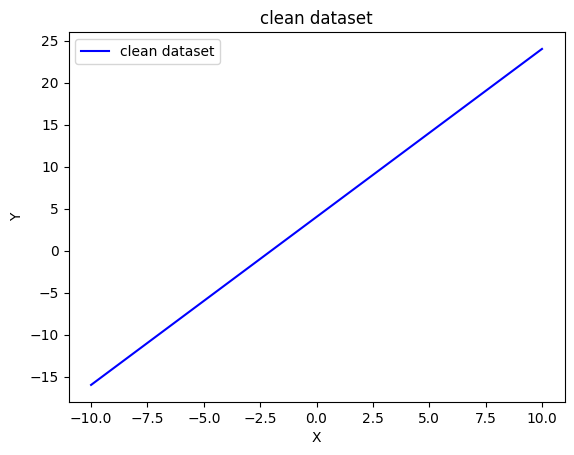

In [3]:
plt.plot(clean_dataset["x"], clean_dataset["y"], label="clean dataset", color = "blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("clean dataset")
plt.legend()
plt.show()

Adding some noise with normal distribution
y = m1*x+m2+N(0,1)
where N(0,1) is normal distribution.

In [4]:
np.random.seed(42)
noise = np.random.normal(0, 1, size=clean_dataset.shape[0])
noisy_data =clean_dataset.copy()
noisy_data["y"] += noise
noisy_data.to_csv("noisy_dataset.csv", index = False)


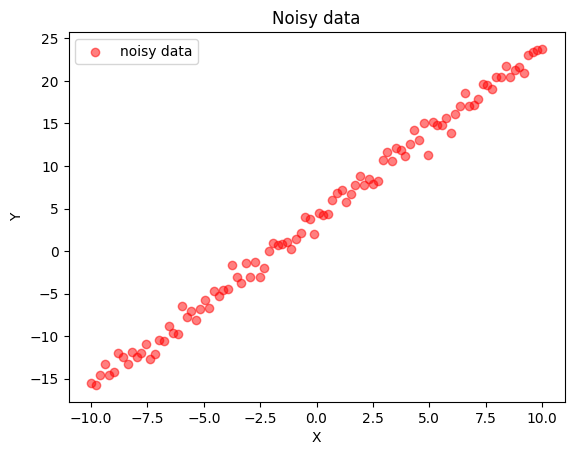

In [5]:
plt.scatter(noisy_data["x"], noisy_data["y"], label = "noisy data", color = "red", alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Noisy data")
plt.legend()
plt.show()

Finding the best fit line using gradient descent algorithm

In [ ]:
x = noisy_data["x"].values
y = noisy_data["y"].values
m1 = 0.0
m2 = 0.0
alpha = 0.001
length = len(x)
loss_values = []
m1_values = []
epochs=5000
for _ in range(epochs):
    predicted_y = m1*x+m2
    error = y-predicted_y
    dm1 =(-2/length)*np.sum(x*error)
    dm2 = (-2/length)*np.sum(error)
    m1 -= alpha*dm1
    m2 -= alpha*dm2
    loss = np.mean(error**2)
    loss_values.append(loss)
    m1_values.append(m1)
threshold_index = np.argmax(np.diff(m1) > -0.01)
print("m1 value:", m1)
print("m2 value:", m2)
print(threshold_index)

m1 value: 2.006896633668325
m2 value: 3.8959783598860427
451


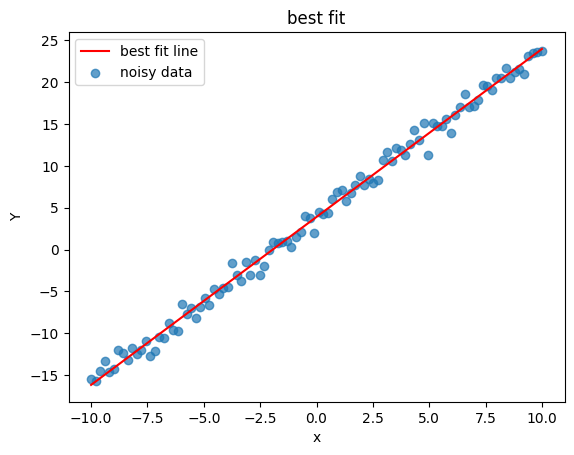

In [28]:
plt.plot(x, x*m1+m2, label="best fit line", color="red")
plt.scatter(noisy_data["x"], noisy_data["y"], label="noisy data", alpha=0.7)
plt.xlabel("x")
plt.ylabel("Y")
plt.title("best fit")
plt.legend()
plt.show()

Error plot(loss vs m1)

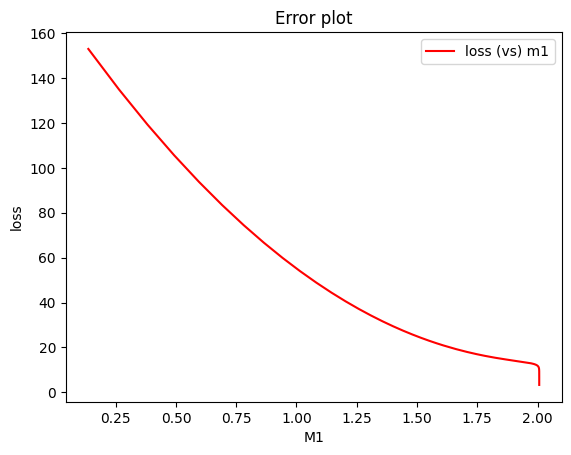

In [31]:
plt.plot(m1_values[:threshold_index], loss_values[:threshold_index], label="loss (vs) m1", color="red")
plt.xlabel("M1")
plt.ylabel("loss")
plt.title("Error plot")
plt.legend()
plt.show()

Finding the best fit line by using linear search

In [25]:
m1_values = np.linspace(0, 5, 100)
m2_values = np.linspace(0, 5, 100)
min_loss = float("inf")
best_m1 = None
best_m2 = None
loss_values = []
m1_value_plot = []
for m1 in m1_values:
    for m2 in m2_values:
        predicted_y = (x*m1) + m2
        loss = np.mean((y-predicted_y)**2)
        if(loss < min_loss):
            min_loss = loss
            best_m1 = m1
            best_m2 = m2
    loss_values.append(min_loss)
    m1_value_plot.append(m1)
threshold_index = np.argmax(np.diff(loss_values) > -0.01)
print("m1 value:", best_m1)
print("m2 value:", best_m2)
print(threshold_index)

m1 value: 2.0202020202020203
m2 value: 3.888888888888889
40


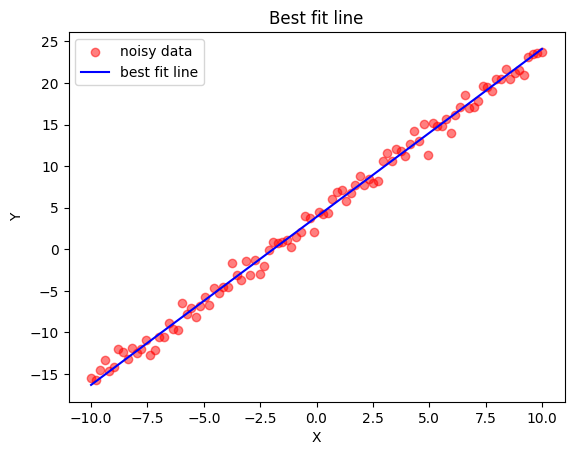

In [23]:
plt.scatter(x, y, color="red", label="noisy data", alpha=0.5)
plt.plot(x, x*best_m1 + best_m2, color="blue", label="best fit line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Best fit line")
plt.legend()
plt.show()


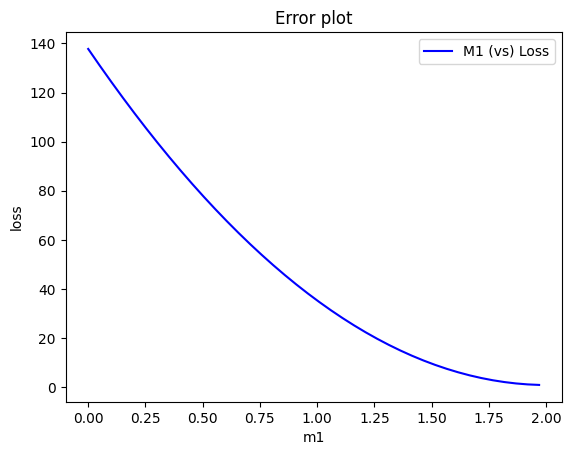

In [26]:
plt.plot(m1_value_plot[:threshold_index], loss_values[:threshold_index], color="blue", label="M1 (vs) Loss")
plt.xlabel("m1")
plt.ylabel("loss")
plt.title("Error plot")
plt.legend()
plt.show()